In [1]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from langchain_core.prompts import ChatPromptTemplate
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
class Graphstate(TypedDict):
    message: str
    response: str

In [3]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant that will help the user with their query. Keep your answer concise.",
        ),
        ("human", "{input}"),
    ]
)

In [4]:
model = ChatGoogleGenerativeAI(model = "gemini-2.5-flash", temperature = 0.1)

In [5]:
model_chain = prompt | model

In [ ]:
def ask_gemini(state: Graphstate):
    message = state["message"]
    state["response"] = model_chain.invoke({"input": message})
    return state

In [7]:
workflow = StateGraph(Graphstate)

workflow.add_node("ask_gemini", ask_gemini)

workflow.add_edge(START, "ask_gemini")
workflow.add_edge("ask_gemini", END)

graph_compile = workflow.compile()

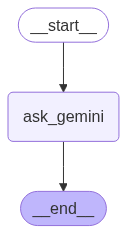

In [8]:
display(Image(graph_compile.get_graph().draw_mermaid_png()))

In [9]:
response = graph_compile.invoke({"message": "what is machine learning?"})

what is machine learning?


In [10]:
response

{'message': 'what is machine learning?',
 'response': AIMessage(content='Machine learning is a subset of artificial intelligence that enables systems to learn from data, identify patterns, and make decisions or predictions without being explicitly programmed.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--dc5d1ad1-c68f-44bd-8210-f6000b338bc1-0', usage_metadata={'input_tokens': 25, 'output_tokens': 82, 'total_tokens': 107, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 53}})}

In [13]:
print(response["response"].content)

Machine learning is a subset of artificial intelligence that enables systems to learn from data, identify patterns, and make decisions or predictions without being explicitly programmed.
